In [2]:
using CSV
using Random
using StatsBase
using DataFrames
using Turing
using StatsPlots
using StatsFuns
using LaTeXStrings
using StatisticalRethinking
using StatisticalRethinking: link
using StatisticalRethinkingPlots
using ParetoSmooth
using ParetoSmoothedImportanceSampling
using Logging

default(labels=false)
Logging.disable_logging(Logging.Warn);

# 9.1 Good King Markov and his island kingdom

Code 9.1

In [3]:
Random.seed!(1)
num_weeks = 10^5
positions = []
current = 10

for i ∈ 1:num_weeks
    # record current position
    push!(positions, current)
    # flip coin to generate proposal
    proposal = current + sample([-1, 1])
    # handle loops around
    proposal < 1 && (proposal = 10)
    proposal > 10 && (proposal = 1)
    # move?
    prob_move = proposal / current
    rand() < prob_move && (current = proposal)
end

Code 9.2

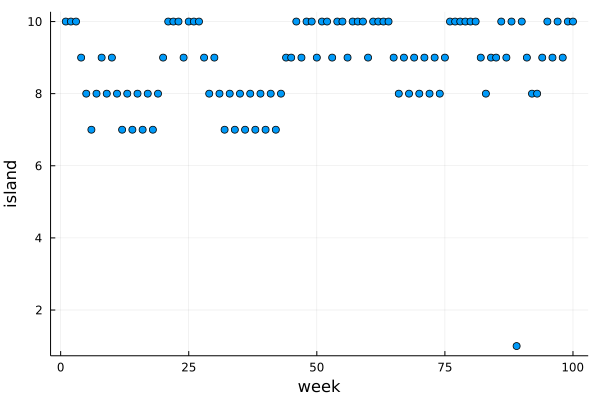

In [4]:
scatter(positions[1:100], xlab="week", ylab="island")

Code 9.3

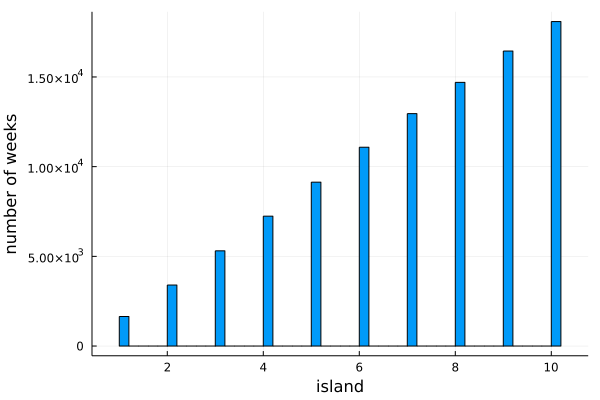

In [5]:
histogram(positions, xlab="island", ylab="number of weeks")

# 9.2 Metropolis algorithms